In [385]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import time
import zipfile
import locale
import calendar
from scipy import stats

pd.set_option("display.max_columns", 50)
locale.setlocale( locale.LC_ALL, '' )

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [3]:
## debugging 

# import pdb; pdb.set_trace()
# c means continue
# n means n
# can type in variable names

In [4]:
# list of suburbs with state-led greenfield residential developments
greenfield_development_suburb_list = ["BOX HILL",
                                      "COLEBEE",
                                      "MARSDEN PARK",
                                      "KELLYVILLE",
                                      "RIVERSTONE",
                                      "SCHOFIELDS",
                                      "ROUSE HILL",
                                      "VINEYARD",
                                      "SCHOFIELDS",
                                      "AUSTRAL",
                                      "CATHERINE FIELD",
                                      "EDMONDSON PARK",
                                      "LEPPINGTON",
                                      "ORAN PARK"]






# --- LAND VALUE DATA ---

In [94]:
## checking structure of land value data
zip_path = Path("data/land_value_data/LV_20170701.zip")
zf = zipfile.ZipFile(zip_path)
start_time = time.time()

test_df = pd.read_csv(zf.open("001_LAND_VALUE_DATA_20170701.csv"), dtype=dtype_dict)

elapsed_time = time.time() - start_time
print(elapsed_time)

test_df.sample(3)

0.1256883144378662


DISTRICT CODE DISTRICT NAME  PROPERTY ID PROPERTY TYPE PROPERTY NAME  \
23084              1      CESSNOCK      3298972        NORMAL           NaN   
210                1      CESSNOCK      2894940        NORMAL           NaN   
13706              1      CESSNOCK        12446        NORMAL           NaN   

      UNIT NUMBER HOUSE NUMBER STREET NAME  SUBURB NAME  POSTCODE  \
23084         NaN           77  RADFORD ST   CLIFTLEIGH    2321.0   
210           NaN            4  BROWN CRES  KURRI KURRI    2327.0   
13706         NaN           15  MERTHYR ST  KURRI KURRI    2327.0   

      PROPERTY DESCRIPTION ZONE CODE    AREA AREA TYPE BASE DATE 1  \
23084            8/1105616        R2  1000.0         M  01/07/2016   
210           2017/1038865        R2   709.8         M  01/07/2016   
13706            12/565794        R3   505.7         M  01/07/2016   

       LAND VALUE 1 AUTHORITY 1 BASIS 1 BASE DATE 2  LAND VALUE 2 AUTHORITY 2  \
23084      193000.0      14A(1)   6A(1)  01/07/2015      186000.0      14A(1)   
210        151000.0      14A(1)   6A(1)  01/07/2015      151000.0      14A(1)   
13706      139000.0      14A(1)   6A(1)  01/07/2015      135000.0      14A(1)   

      BASIS 2 BASE DATE 3  LAND VALUE 3 AUTHORITY 3 BASIS 3 BASE DATE 4  \
23084   6A(1)  01/07/2014      177000.0      14A(1)   6A(1)  01/07/2013   
210     6A(1)  01/07/2014      147000.0      14A(1)   6A(1)  01/07/2013   
13706   6A(1)  01/07/2014      124000.0      14A(1)   6A(1)  01/07/2013   

       LAND VALUE 4 AUTHORITY 4 BASIS 4 BASE DATE 5  LAND VALUE 5 AUTHORITY 5  \
23084      177000.0      14A(1)   6A(1)  01/07/2012      169000.0      14A(1)   
210        141000.0      14A(1)   6A(1)  01/07/2012      138000.0      14A(1)   
13706      120000.0      14A(1)   6A(1)  01/07/2012      120000.0      14A(1)   

      BASIS 5 Unnamed: 34  
23084   6A(1)         NaN  
210     6A(1)         NaN  
13706   6A(1)         NaN

In [6]:
## aggregating land value csv files

def read_csv_and_add_column(csv):
    df = pd.read_csv(zf.open(csv), 
                     encoding="ISO-8859-1", 
                     error_bad_lines=False,
                     dtype=dtype_dict)
    df["SOURCE CSV FILENAME"] = csv
    return df


    zf_list = zf.namelist()
    csv_list = [k for k in zf_list if ".csv" in k]
    return csv_list


zip_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))
land_value_csv_list = sorted(Path("data/land_value_data").glob("**/*.csv"))
land_value_csv_list_stems =  [k.stem for k in land_value_csv_list]

# loop through all zips, if zip isn't processed then process it
for zip_path in zip_path_list:
    if (zip_path.stem + "_combined") not in land_value_csv_list_stems:
        start_time = time.time()

        zf = zipfile.ZipFile(zip_path)

        zf_df = pd.concat([read_csv_and_add_column(csv) for csv in get_namelist_csv_only(zf)], sort=False)
        zf.close()

        zf_df["SOURCE ZIP FILENAME"] = csv

        zf_df.to_csv(Path("data/land_value_data/{}_combined.csv".format(zip_path.stem)), compression="zip")

        elapsed_time = time.time() - start_time
        print(zip_path.stem + " - " + str(elapsed_time))
    else:
        print("{} has already been processed".format(zip_path.stem))

LV_20170701 has already been processed
LV_20170801 has already been processed
LV_20170901 has already been processed
LV_20171001 has already been processed
LV_20171101 has already been processed
LV_20171201 has already been processed
LV_20180101 has already been processed
LV_20180201 has already been processed
LV_20180301 has already been processed
LV_20180401 has already been processed
LV_20180501 has already been processed
LV_20180601 has already been processed
LV_20180701 has already been processed
LV_20180801 has already been processed
LV_20180901 has already been processed
LV_20181001 has already been processed
LV_20181101 has already been processed
LV_20181201 has already been processed
LV_20190101 has already been processed
LV_20190201 has already been processed
LV_20190301 has already been processed
LV_20190401 has already been processed
LV_20190501 has already been processed
LV_20190601 has already been processed
LV_20190701 has already been processed


In [7]:
## yearly slices
land_value_df_2017 = pd.read_csv(land_value_csv_list[0], compression="zip", dtype=dtype_dict)
land_value_df_2018 = pd.read_csv(land_value_csv_list[12], compression="zip", dtype=dtype_dict)
land_value_df_2019 = pd.read_csv(land_value_csv_list[24], compression="zip", dtype=dtype_dict)

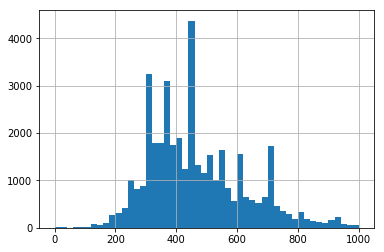

In [8]:
## histogram of suburbs with state-led greenfield residential developments 
land_value_df_2019["AREA"][(land_value_df_2019["SUBURB NAME"].isin(greenfield_development_suburb_list)) & \
                           (land_value_df_2019["AREA TYPE"] == "M")].hist(range=(0, 1000), bins=50)

In [9]:
## search through df
land_value_df_2019[:][(land_value_df_2019["SUBURB NAME"].isin(greenfield_development_suburb_list))].sample(3)

Unnamed: 0  DISTRICT CODE    DISTRICT NAME  PROPERTY ID  \
390688        48978             81  THE HILLS SHIRE      2774972   
1190218       60142            214        BLACKTOWN      4028009   
373415        31705             81  THE HILLS SHIRE       596498   

        PROPERTY TYPE PROPERTY NAME UNIT NUMBER HOUSE NUMBER   STREET NAME  \
390688         NORMAL           NaN         NaN           39   HARVARD CCT   
1190218        NORMAL           NaN         NaN           15  SYNCARPIA ST   
373415         NORMAL           NaN         NaN           29   JANAMBA AVE   

          SUBURB NAME  POSTCODE PROPERTY DESCRIPTION ZONE CODE   AREA  \
390688     ROUSE HILL    2155.0         1603/1016365        R2  651.6   
1190218  MARSDEN PARK    2765.0            34/270986        R3  189.0   
373415     KELLYVILLE    2155.0            29/248878        R2  696.8   

        AREA TYPE BASE DATE 1  LAND VALUE 1 AUTHORITY 1 BASIS 1 BASE DATE 2  \
390688          M  01/07/2018      542000.0      14A(1)   6A(1)  01/07/2017   
1190218         M  01/07/2018      265000.0      14A(1)     14E  01/07/2017   
373415          M  01/07/2018      630000.0      14A(1)   6A(1)  01/07/2017   

         LAND VALUE 2 AUTHORITY 2 BASIS 2 BASE DATE 3  LAND VALUE 3  \
390688       542000.0      14A(1)   6A(1)  01/07/2016      493000.0   
1190218      265000.0      14A(1)     14E  01/07/2016      245000.0   
373415       652000.0      14A(1)   6A(1)  01/07/2016      585000.0   

        AUTHORITY 3 BASIS 3 BASE DATE 4  LAND VALUE 4 AUTHORITY 4 BASIS 4  \
390688       14A(1)   6A(1)  01/07/2015      448000.0      14A(1)   6A(1)   
1190218         27B     14E  01/07/2015           NaN         NaN     NaN   
373415       14A(1)   6A(1)  01/07/2015      504000.0      14A(1)   6A(1)   

        BASE DATE 5  LAND VALUE 5 AUTHORITY 5 BASIS 5 Unnamed: 34  \
390688   01/07/2014      383000.0      14A(1)   6A(1)         NaN   
1190218  01/07/2014      185000.0         27B     14E         NaN   
373415   01/07/2014      420000.0      14A(1)   6A(1)         NaN   

                      SOURCE CSV FILENAME               SOURCE ZIP FILENAME  
390688   081_LAND_VALUE_DATA_20190701.csv  708_LAND_VALUE_DATA_20190601.csv  
1190218  214_LAND_VALUE_DATA_20190701.csv  708_LAND_VALUE_DATA_20190601.csv  
373415   081_LAND_VALUE_DATA_20190701.csv  708_LAND_VALUE_DATA_20190601.csv




## MARSDEN PARK ANALYSIS 

In [10]:
def get_min_max_of_land_value_df(df):
    min_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].min(), grouping=True)
    max_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].max(), grouping=True)
    return [min_land_value, max_land_value]

#  print([get_min_max_of_land_value_df(land_value_df_2017),
#         get_min_max_of_land_value_df(land_value_df_2018),
#         get_min_max_of_land_value_df(land_value_df_2019)])

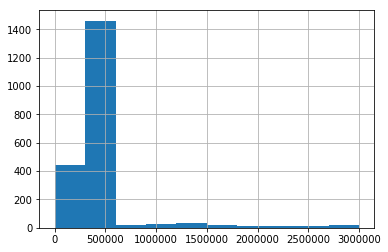

In [11]:
## land value histogram
land_value_df_2017["LAND VALUE 1"][(land_value_df_2017["SUBURB NAME"] == "MARSDEN PARK")].hist(range=(0, 3000000))




## NSW ANALYSIS


In [12]:
suburbs_list_2017 = land_value_df_2017["SUBURB NAME"].unique()
suburbs_list_2018 = land_value_df_2018["SUBURB NAME"].unique()
suburbs_list_2019 = land_value_df_2019["SUBURB NAME"].unique()

## founding of new suburbs

## 2017-2018
print("2017-2018",np.setdiff1d(suburbs_list_2018,suburbs_list_2017))

## 2018-2019
print("2018-2019",np.setdiff1d(suburbs_list_2019,suburbs_list_2018))


2017-2018 ['DIAMOND HEAD' 'FERNANCES CROSSING' 'MOUNT TENANDRA' 'MURRAYS RUN'
 'PERISHER VALLEY']
2018-2019 ['BONDI FOREST' 'MAGOMETON' 'NORTH KELLYVILLE' 'NORWEST']


In [13]:
## create null/not null versions of 2017 and 2019 dataframes
suburbs_list_2017_null = land_value_df_2017[:][land_value_df_2017["PROPERTY NAME"].isnull()]
suburbs_list_2017_not_null = land_value_df_2017[:][~land_value_df_2017["PROPERTY NAME"].isnull()]
suburbs_list_2019_null = land_value_df_2019[:][land_value_df_2019["PROPERTY NAME"].isnull()]
suburbs_list_2019_not_null = land_value_df_2019[:][~land_value_df_2019["PROPERTY NAME"].isnull()]

In [14]:
## land value sum of suburbs
suburb_land_value_sum_2017 = suburbs_list_2017_null.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("a")
suburb_land_value_sum_2019 = suburbs_list_2019_null.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("b")
suburb_land_value_sum_df = pd.concat([suburb_land_value_sum_2017,
                                      suburb_land_value_sum_2019], axis=1, sort=False).reset_index()

suburb_land_value_sum_df["DIFFERENCE ($)"] = suburb_land_value_sum_df.apply(lambda row: row.b - row.a , axis=1)
suburb_land_value_sum_df.rename(columns={"index": "SUBURB NAME", 
                                         "a": "2017 LAND VALUE ($)", 
                                         "b": "2019 LAND VALUE ($)"}).sort_values(by="DIFFERENCE ($)", ascending=False).head(10)

SUBURB NAME  2017 LAND VALUE ($)  2019 LAND VALUE ($)  DIFFERENCE ($)
2666        MOSMAN         1.487654e+10         1.900893e+10    4.132386e+09
3610        SYDNEY         7.745653e+09         1.128333e+10    3.537677e+09
2439  MARSDEN PARK         1.767013e+09         4.188689e+09    2.421676e+09
3573   STRATHFIELD         9.285835e+09         1.166346e+10    2.377624e+09
2438  MARRICKVILLE         8.222658e+09         1.013206e+10    1.909401e+09
823    CASTLE HILL         1.018265e+10         1.199325e+10    1.810595e+09
2246    LEPPINGTON         1.708916e+09         3.407987e+09    1.699072e+09
524       BOX HILL         1.937968e+09         3.564921e+09    1.626954e+09
2452        MASCOT         4.406044e+09         5.977372e+09    1.571328e+09
2408         MANLY         6.413372e+09         7.970970e+09    1.557598e+09

### LAND AREA ANALYSIS

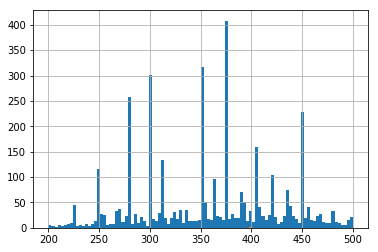

In [50]:
## evidence to support that null property names are 
def create_land_area_hist(df):
    df["AREA"][df["AREA TYPE"] == "M"].hist(range=(200, 500), bins=100)

marsden_park_2019_null_df = suburbs_list_2019_null[:][suburbs_list_2019_null["SUBURB NAME"] == "MARSDEN PARK"]
marsden_park_2019_not_null_df = suburbs_list_2019_not_null[:][suburbs_list_2019_not_null["SUBURB NAME"] == "MARSDEN PARK"]

create_land_area_hist(marsden_park_2019_null_df)
create_land_area_hist(marsden_park_2019_not_null_df)

In [16]:
## check what kind of houses are ~1000 m2
marsden_park_2019_null_df[(marsden_park_2019_null_df["AREA TYPE"] == "M") & \
                          (marsden_park_2019_null_df["AREA"] > 200) & \
                          (marsden_park_2019_null_df["AREA"] < 500)].sort_values(by="LAND VALUE 1", ascending=False)

## marsden park land sizes

Unnamed: 0  DISTRICT CODE DISTRICT NAME  PROPERTY ID PROPERTY TYPE  \
1244457      114381            214     BLACKTOWN      3931418        NORMAL   
1244464      114388            214     BLACKTOWN      3931425        NORMAL   
1244460      114384            214     BLACKTOWN      3931421        NORMAL   
1244461      114385            214     BLACKTOWN      3931422        NORMAL   
1244462      114386            214     BLACKTOWN      3931423        NORMAL   
1138334        8258            214     BLACKTOWN      4209179        NORMAL   
1138333        8257            214     BLACKTOWN      4209178        NORMAL   
1137655        7579            214     BLACKTOWN      4197403        NORMAL   
1138324        8248            214     BLACKTOWN      4209169        NORMAL   
1138319        8243            214     BLACKTOWN      4209164        NORMAL   
1138305        8229            214     BLACKTOWN      4209150        NORMAL   
1138306        8230            214     BLACKTOWN      4209151        NORMAL   
1138344        8268            214     BLACKTOWN      4209189        NORMAL   
1135284        5208            214     BLACKTOWN      4163562        NORMAL   
1188447       58371            214     BLACKTOWN      4132928        NORMAL   
1243074      112998            214     BLACKTOWN      3893846        NORMAL   
1188448       58372            214     BLACKTOWN      4132929        NORMAL   
1188677       58601            214     BLACKTOWN      4133033        NORMAL   
1190654       60578            214     BLACKTOWN      4026425        NORMAL   
1244508      114432            214     BLACKTOWN      3943138        NORMAL   
1244507      114431            214     BLACKTOWN      3943137        NORMAL   
1244510      114434            214     BLACKTOWN      3943140        NORMAL   
1242727      112651            214     BLACKTOWN      3988185        NORMAL   
1244512      114436            214     BLACKTOWN      3943142        NORMAL   
1189671       59595            214     BLACKTOWN      4124013        NORMAL   
1189370       59294            214     BLACKTOWN      4122203        NORMAL   
1244140      114064            214     BLACKTOWN      3986836        NORMAL   
1240706      110630            214     BLACKTOWN      3851343        NORMAL   
1244147      114071            214     BLACKTOWN      3986843        NORMAL   
1244144      114068            214     BLACKTOWN      3986840        NORMAL   
...             ...            ...           ...          ...           ...   
1146943       16867            214     BLACKTOWN      2159163        NORMAL   
1146944       16868            214     BLACKTOWN      2159164        NORMAL   
1231212      101136            214     BLACKTOWN      3647188        NORMAL   
1231220      101144            214     BLACKTOWN      3647201        NORMAL   
1240673      110597            214     BLACKTOWN      3770452        NORMAL   
1240672      110596            214     BLACKTOWN      3770451        NORMAL   
1228234       98158            214     BLACKTOWN      3166307        NORMAL   
1228731       98655            214     BLACKTOWN      3213726        NORMAL   
1169900       39824            214     BLACKTOWN      2199135        NORMAL   
1183346       53270            214     BLACKTOWN      3527518        NORMAL   
1227934       97858            214     BLACKTOWN      3117568        NORMAL   
1204356       74280            214     BLACKTOWN      2222417        NORMAL   
1204357       74281            214     BLACKTOWN      2222418        NORMAL   
1208600       78524            214     BLACKTOWN      2214840        NORMAL   
1208599       78523            214     BLACKTOWN      2214839        NORMAL   
1146927       16851            214     BLACKTOWN      2159147        NORMAL   
1147088       17012            214     BLACKTOWN      2161840        NORMAL   
1175470       45394            214     BLACKTOWN      2172501        NORMAL   
1192084       62008            214     BLACKTOWN      21972

### NULL/NOT NULL PROPERTY NAME ANALYSIS

In [17]:
## investigating property name column

# sorted(land_value_df_2019["PROPERTY NAME"][~land_value_df_2019["PROPERTY NAME"].isnull()].unique())

# max_null = land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()].max()
# land_value_df_2019[:][land_value_df_2019["LAND VALUE 1"] == max_null]

null_land_value_list = sorted(land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()])
land_value_df_2019[:][land_value_df_2019["LAND VALUE 1"].isin(null_land_value_list)].sort_values(by=["LAND VALUE 1"], ascending=False)

# land_value_df_2019["LAND VALUE 1"][~land_value_df_2019["PROPERTY NAME"].isnull()].hist()

# land_value_df_2019[:][land_value_df_2019["PROPERTY NAME"].isnull() & (land_value_df_2019["LAND VALUE 1"] < 100)].sort_values(by="LAND VALUE 1", ascending=False)

Unnamed: 0  DISTRICT CODE       DISTRICT NAME  PROPERTY ID  \
2599189       27552            708      CITY OF SYDNEY      3819161   
346811         5101             81     THE HILLS SHIRE      4201444   
2594104       22467            708      CITY OF SYDNEY      3169836   
2593732       22095            708      CITY OF SYDNEY      4040113   
526875        25985             90                RYDE      3989413   
2594707       23070            708      CITY OF SYDNEY      3716196   
1186170       56094            214           BLACKTOWN      4106580   
2002562       48160            261          CUMBERLAND      3623946   
1954225       48212            260  CITY OF PARRAMATTA      3956735   
393882        52172             81     THE HILLS SHIRE      3845503   
2573115        1478            708      CITY OF SYDNEY      2038311   
394222        52512             81     THE HILLS SHIRE      3833062   
526907        26017             90                RYDE      3979359   
2594684       23047            708      CITY OF SYDNEY      3697225   
500482         9974             88        NORTH SYDNEY      3638126   
2599182       27545            708      CITY OF SYDNEY      3785510   
526600        25710             90                RYDE      3342845   
2331837        8766            276             BAYSIDE      3750239   
2575084        3447            708      CITY OF SYDNEY      3435979   
2575234        3597            708      CITY OF SYDNEY      4183121   
512144        11254             90                RYDE       894877   
2580933        9296            708      CITY OF SYDNEY      2123696   
2593905       22268            708      CITY OF SYDNEY      4124443   
2331840        8769            276             BAYSIDE      3750243   
1954224       48211            260  CITY OF PARRAMATTA      3956734   
2573395        1758            708      CITY OF SYDNEY      2035943   
2573055        1418            708      CITY OF SYDNEY      2027792   
2572891        1254            708      CITY OF SYDNEY      2038096   
2594396       22759            708      CITY OF SYDNEY      3679936   
2594539       22902            708      CITY OF SYDNEY      3799662   
...             ...            ...                 ...          ...   
114174         1347              5            MAITLAND      3387900   
145346        32519              5            MAITLAND      3981724   
2062222        1828            266            HILLTOPS       410730   
108943        77722              4      LAKE MACQUARIE      3270976   
2332087        9016            276             BAYSIDE      3737770   
190715        36757              8           NEWCASTLE       233809   
190716        36758              8           NEWCASTLE       233812   
1590672       64774            224             PENRITH      3773295   
154736          778              8           NEWCASTLE      3407962   
154350          392              8           NEWCASTLE      2922545   
153865         7540              7        MUSWELLBROOK      3851843   
2332088        9017            276             BAYSIDE      3737771   
157578         3620              8           NEWCASTLE      3582769   
17641         17641              1            CESSNOCK        18716   
2575340        3703            708      CITY OF SYDNEY      4143552   
1059453        1053            188            INVERELL      4097681   
2417669         431            529   GOULBURN MULWAREE      3397910   
185916        31958              8           NEWCASTLE       224085   
490148         6554             87              MOSMAN      3498865   
107759        76538              4      LAKE MACQUARIE      3722805   
171289        17331              8           NEWCASTLE       217513   
128695        15868              5            MAITLAND       182913   
157579         3621              8           NEWCASTLE      3582772   
2575338        3701            708      CITY OF SYDNEY      4143550   
2575301        3664            70

In [70]:
## quantile range
null_property_name_series = land_value_df_2017["LAND VALUE 1"][land_value_df_2017["PROPERTY NAME"].isnull() &
                                                               land_value_df_2017["SUBURB NAME"].isin(greenfield_development_suburb_list)]
not_null_property_name_series = land_value_df_2017["LAND VALUE 1"][~land_value_df_2017["PROPERTY NAME"].isnull() &
                                                                   land_value_df_2017["SUBURB NAME"].isin(greenfield_development_suburb_list)]

print(null_property_name_series.quantile([0, 0.25, 0.5, 0.75, 1]))
print(not_null_property_name_series.quantile([0, 0.25, 0.5, 0.75, 1]))

0.00            1.0
0.25       392000.0
0.50       466000.0
0.75       601000.0
1.00    100000000.0
Name: LAND VALUE 1, dtype: float64
0.00         330.0
0.25      126250.0
0.50      585000.0
0.75     2425000.0
1.00    54000000.0
Name: LAND VALUE 1, dtype: float64


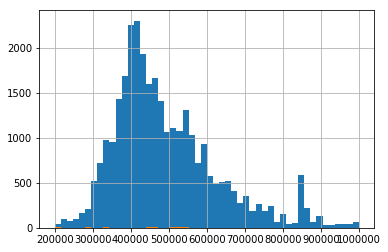

In [71]:
## histograms
null_property_name_series.hist(range=(200000, 1000000), bins=50)
not_null_property_name_series.hist(range=(200000, 1000000), bins=50)

## DETERMINING NUMBER OF HOUSES IN EACH SUBURB IN NSW

In [183]:
## criteria
# - null property name
# - area type = "M"
# - area is between 200 and 800 m2
# POTENTIALLY - land value is between 200,000 and 800,000
# POTENTIALLY - suburb is a part of the greenfield development suburb list

suburb_number_of_houses = land_value_df_2019[land_value_df_2019["PROPERTY NAME"].isnull() & \
                                             (land_value_df_2019["AREA TYPE"] == "M") & \
                                             (land_value_df_2019["AREA"] > 200) & \
                                             (land_value_df_2019["AREA"] < 800)].groupby("SUBURB NAME").count().max(axis=1)

suburb_number_of_houses_list = suburb_number_of_houses.sort_values(ascending=False)
suburb_number_of_houses_list

SUBURB NAME
PORT MACQUARIE        11580
BLACKTOWN             10370
ORANGE                 8711
DUBBO                  8323
KELLYVILLE             7287
GREYSTANES             7102
QUAKERS HILL           7098
BAULKHAM HILLS         6813
GLENMORE PARK          6670
MAROUBRA               6194
GOULBURN               6014
ST CLAIR               5854
MERRYLANDS             5665
SEVEN HILLS            5620
UMINA BEACH            5413
GREENACRE              5410
MOSMAN                 5267
MARRICKVILLE           5241
CASTLE HILL            5218
EARLWOOD               5135
AUBURN                 5111
SCHOFIELDS             4988
COFFS HARBOUR          4829
ORAN PARK              4776
GLENWOOD               4514
THE PONDS              4400
BROKEN HILL            4382
RYDE                   4338
ENGADINE               4306
FORSTER                4234
                      ...  
COLLOMBATTI               1
TORRINGTON                1
TOWRANG                   1
LORNE                     1
TREGEAGL

## GETTING MONTHLY DATA 

In [267]:
# get month-year format of csv list
csv_stem_list = pd.Series([csv.stem.replace("LV_", "").replace("_combined", "") for csv in land_value_csv_list])

month_series = pd.Series(csv_stem_list.apply(lambda row: row[:6]).apply(lambda row: calendar.month_name[int(row[-2:])]).apply(lambda row: row[:3].capitalize()), 
                         name="MONTH")
year_series = pd.Series(csv_stem_list.apply(lambda row: row[:4]), name="YEAR")
month_year_series = month_series + " " + year_series
# month_year_series

In [284]:
def get_monthly_house_count_for_NSW_suburb(csv):
    csv_df = pd.read_csv(csv, compression="zip", dtype=dtype_dict)
    csv_date = csv.stem
    suburb_number_of_houses = csv_df[csv_df["PROPERTY NAME"].isnull() & \
                                     (csv_df["AREA TYPE"] == "M") & \
                                     (csv_df["AREA"] > 200) & \
                                     (csv_df["AREA"] < 800)].groupby("SUBURB NAME").count().max(axis=1)

    suburb_number_of_houses_list = suburb_number_of_houses.sort_values(ascending=False)
    suburb_number_of_houses_series = pd.Series(suburb_number_of_houses_list, name=csv_date)
    return suburb_number_of_houses_series

start_time = time.time()

house_count_NSW_df = pd.concat([get_monthly_house_count_for_NSW_suburb(csv) for csv in land_value_csv_list], sort=False, axis=1)
house_count_NSW_df = house_count_NSW_df.transpose()

elapsed_time = time.time() - start_time
print(elapsed_time)

395.2121391296387


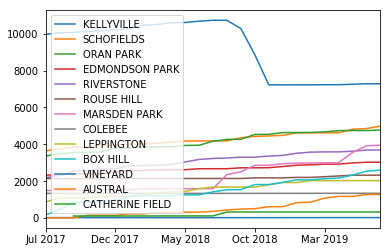

In [301]:
house_count_NSW_df.index = month_year_series
house_count_filter = pd.Series(house_count_NSW_df.columns.values).isin(greenfield_development_suburb_list)
greenfield_development_suburb_house_count_df = house_count_NSW_df.iloc[:, list(house_count_filter)]
greenfield_development_suburb_house_count_df.plot()






# --- CRIME DATA ---

In [20]:
## getting crime data
NSW_crime_data_filepath = Path("data/SuburbData2018.csv")
NSW_crime_df = pd.read_csv(NSW_crime_data_filepath)

In [21]:
# checking structure of crima data
NSW_crime_df.sample(3)

Suburb Offence category                       Subcategory  \
153855        Marulan    Drug offences  Possession and/or use of ecstasy   
110263          Gumma            Arson                             Arson   
85438   Elizabeth Bay         Homicide      Murder accessory, conspiracy   

        Jan 1995  Feb 1995  Mar 1995  Apr 1995  May 1995  Jun 1995  Jul 1995  \
153855         0         0         0         0         0         0         0   
110263         0         0         0         0         0         0         0   
85438          0         0         0         0         0         0         0   

        Aug 1995  Sep 1995  Oct 1995  Nov 1995  Dec 1995  Jan 1996  Feb 1996  \
153855         0         0         0         0         0         0         0   
110263         0         0         0         0         0         0         0   
85438          0         0         0         0         0         0         0   

        Mar 1996  Apr 1996  May 1996  Jun 1996  Jul 1996  Aug 1996  Sep 1996  \
153855         0         0         0         0         0         0         0   
110263         0         0         0         0         0         0         0   
85438          0         0         0         0         0         0         0   

        Oct 1996  ...  Dec 2016  Jan 2017  Feb 2017  Mar 2017  Apr 2017  \
153855         0  ...         0         0         0         0         0   
110263         0  ...         0         0         0         0         0   
85438          0  ...         0         0         0         0         0   

        May 2017  Jun 2017  Jul 2017  Aug 2017  Sep 2017  Oct 2017  Nov 2017  \
153855         0         0         0         0         0         0         0   
110263         0         0         0         0         0         0         0   
85438          0         0         0         0         0         0         0   

        Dec 2017  Jan 2018  Feb 2018  Mar 2018  Apr 2018  May 2018  Jun 2018  \
153855         0         0         0         0         0         0         0   
110263         0         0         0         0         0         0         0   
85438          0         0         0         0         0         0         0   

        Jul 2018  Aug 2018  Sep 2018  Oct 2018  Nov 2018  Dec 2018  
153855         0         0         0         0         0         0  
110263         0         0         0         0         0         0  
85438          0         0         0         0         0         0  

[3 rows x 291 columns]

In [48]:
## search df for string
NSW_crime_df["Suburb"][NSW_crime_df["Suburb"].str.contains("Maryland") == True].unique()

Suburb Offence category                       Subcategory  Jan 1995  \
194651  Penrith    Drug offences  Possession and/or use of ecstasy         0   
194657  Penrith    Drug offences   Dealing, trafficking in ecstasy         0   

        Feb 1995  Mar 1995  Apr 1995  May 1995  Jun 1995  Jul 1995  Aug 1995  \
194651         0         0         0         0         0         0         0   
194657         0         0         0         0         0         0         0   

        Sep 1995  Oct 1995  Nov 1995  Dec 1995  Jan 1996  Feb 1996  Mar 1996  \
194651         0         0         0         0         0         0         0   
194657         0         0         0         0         0         0         0   

        Apr 1996  May 1996  Jun 1996  Jul 1996  Aug 1996  Sep 1996  Oct 1996  \
194651         0         0         0         0         0         0         0   
194657         0         0         0         0         0         0         0   

        ...  Dec 2016  Jan 2017  Feb 2017  Mar 2017  Apr 2017  May 2017  \
194651  ...         0         1         0         1         0         1   
194657  ...         6         1         0         0         2         1   

        Jun 2017  Jul 2017  Aug 2017  Sep 2017  Oct 2017  Nov 2017  Dec 2017  \
194651         0         0         1        31         0         0         0   
194657         0         0         0         6         0         0         0   

        Jan 2018  Feb 2018  Mar 2018  Apr 2018  May 2018  Jun 2018  Jul 2018  \
194651         3         0         0         0         0         0         0   
194657         0         0         0         0         0         0         0   

        Aug 2018  Sep 2018  Oct 2018  Nov 2018  Dec 2018  
194651         0        33         0         1         1  
194657         0         8         0         0         0  

[2 rows x 291 columns]

In [92]:
## funny penrith
NSW_crime_df[:][(NSW_crime_df["Subcategory"].str.contains("ecstasy") == True) & (NSW_crime_df["Suburb"] == "Penrith")]

Suburb Offence category                       Subcategory  Jan 1995  \
194651  Penrith    Drug offences  Possession and/or use of ecstasy         0   
194657  Penrith    Drug offences   Dealing, trafficking in ecstasy         0   

        Feb 1995  Mar 1995  Apr 1995  May 1995  Jun 1995  Jul 1995  Aug 1995  \
194651         0         0         0         0         0         0         0   
194657         0         0         0         0         0         0         0   

        Sep 1995  Oct 1995  Nov 1995  Dec 1995  Jan 1996  Feb 1996  Mar 1996  \
194651         0         0         0         0         0         0         0   
194657         0         0         0         0         0         0         0   

        Apr 1996  May 1996  Jun 1996  Jul 1996  Aug 1996  Sep 1996  Oct 1996  \
194651         0         0         0         0         0         0         0   
194657         0         0         0         0         0         0         0   

        ...  Dec 2016  Jan 2017  Feb 2017  Mar 2017  Apr 2017  May 2017  \
194651  ...         0         1         0         1         0         1   
194657  ...         6         1         0         0         2         1   

        Jun 2017  Jul 2017  Aug 2017  Sep 2017  Oct 2017  Nov 2017  Dec 2017  \
194651         0         0         1        31         0         0         0   
194657         0         0         0         6         0         0         0   

        Jan 2018  Feb 2018  Mar 2018  Apr 2018  May 2018  Jun 2018  Jul 2018  \
194651         3         0         0         0         0         0         0   
194657         0         0         0         0         0         0         0   

        Aug 2018  Sep 2018  Oct 2018  Nov 2018  Dec 2018  
194651         0        33         0         1         1  
194657         0         8         0         0         0  

[2 rows x 291 columns]

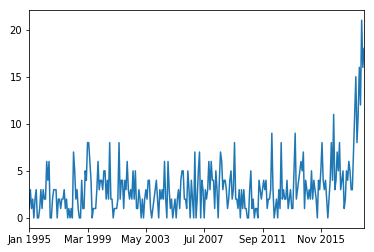

In [23]:
## suburb crime histogram
suburb_crime_df = NSW_crime_df[:][NSW_crime_df["Suburb"] == "Box Hill"]
suburb_crime_timeseries = suburb_crime_df.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
suburb_crime_timeseries.plot()

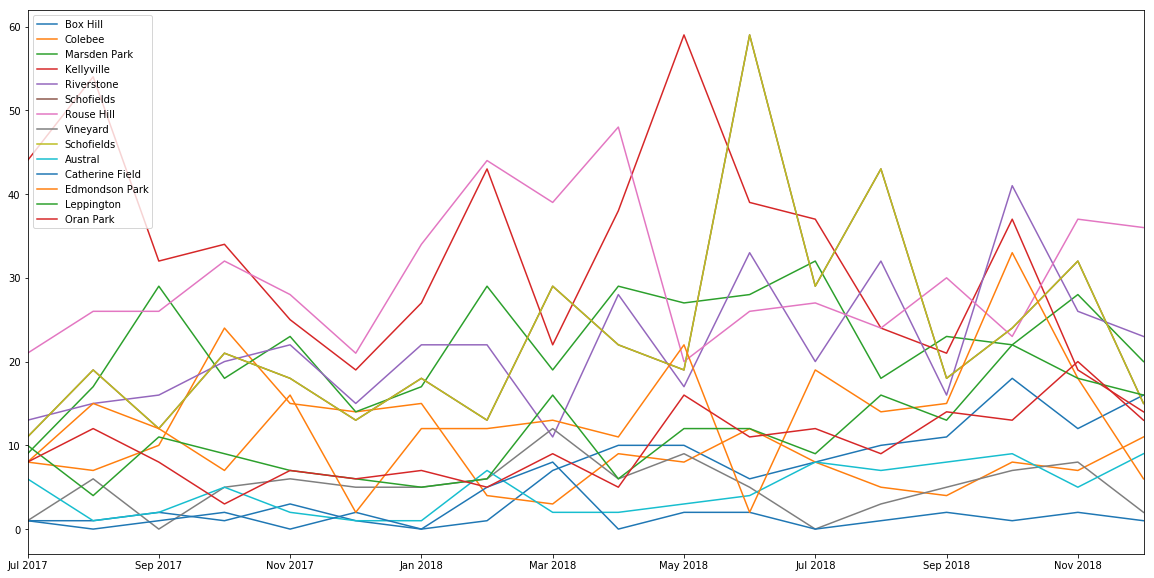

In [133]:
## loop through suburbs with state-led greenfield residential developments and create timeseries graph
propercase_greenfield_development_suburb_list = [k.title() for k in greenfield_development_suburb_list]

def create_crime_sum_pd_time_series(suburb):
    current_suburb_df = NSW_crime_df[:][(NSW_crime_df["Suburb"] == suburb) & (NSW_crime_df["Offence category"] == "Theft")]
    current_suburb_timeseries = current_suburb_df.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).reset_index()
    current_suburb_timeseries_sum = current_suburb_timeseries.sum(axis = 0)
    current_suburb_sum_series = pd.Series(current_suburb_timeseries_sum,
                                          index=current_suburb_timeseries.columns.values,
                                          name=suburb).drop(["index"])
    return current_suburb_sum_series

greenfield_development_suburb_crime_df = create_crime_sum_pd_time_series(propercase_greenfield_development_suburb_list[0])

greenfield_development_suburb_crime_df = pd.concat([create_crime_sum_pd_time_series(suburb) for suburb in propercase_greenfield_development_suburb_list], axis=1)
# greenfield_development_suburb_crime_df[:][greenfield_development_suburb_crime_df.index.isin(["Jul"])]
crime_df_filter = greenfield_development_suburb_crime_df.reset_index().index > 269
greenfield_development_suburb_crime_df[crime_df_filter].plot(figsize=(20,10))

In [25]:
## types of offences
unique_offence_categories = NSW_crime_df["Offence category"].unique()
sorted(unique_offence_categories)

['Abduction and kidnapping',
 'Against justice procedures',
 'Arson',
 'Assault',
 'Betting and gaming offences',
 'Blackmail and extortion',
 'Disorderly conduct',
 'Drug offences',
 'Homicide',
 'Intimidation, stalking and harassment',
 'Liquor offences',
 'Malicious damage to property',
 'Other offences',
 'Other offences against the person',
 'Pornography offences',
 'Prohibited and regulated weapons offences',
 'Prostitution offences',
 'Robbery',
 'Sexual offences',
 'Theft',
 'Transport regulatory offences']

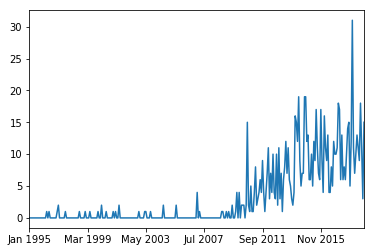

In [138]:
## filter suburb and offence category then plot
marsdenpark_data = NSW_crime_df[:][(NSW_crime_df["Suburb"] == "The Ponds") &
                                   (NSW_crime_df["Offence category"] == "Theft")]
total_crime_timeseries = marsdenpark_data.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
total_crime_timeseries.plot()






# --- CORRELATION ANALYSIS ---

1
-0.22898228295228495
2
0.051170449585646816
3
0.4244662959860548
4
0.5772826355606904
5
6
0.13561903632209474
7
nan
8
9
0.6200185363103713
10
11
0.26141212988218765
12


C:\Users\elija\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


0.6708742432497621
13
0.6335988510153641
14


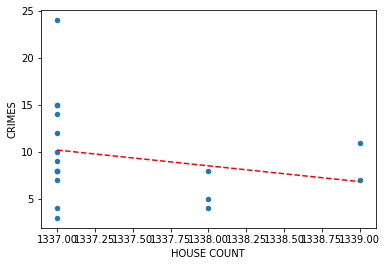

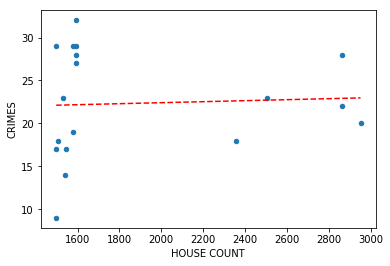

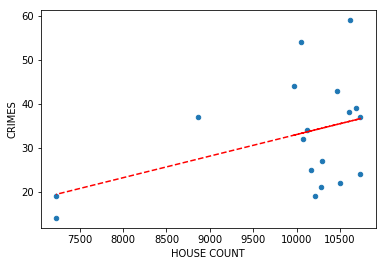

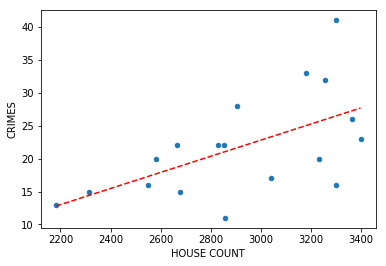

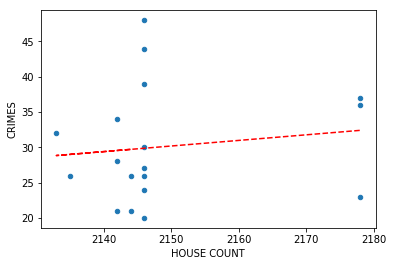

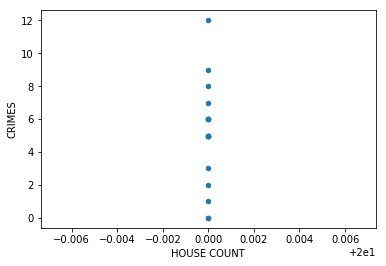

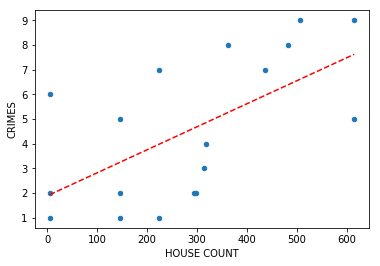

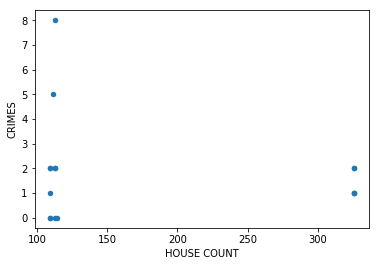

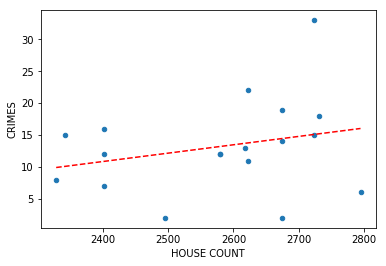

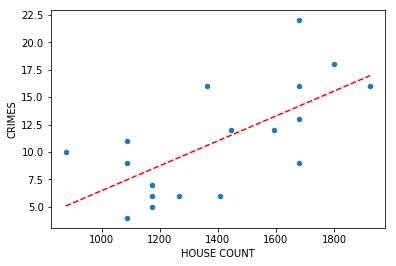

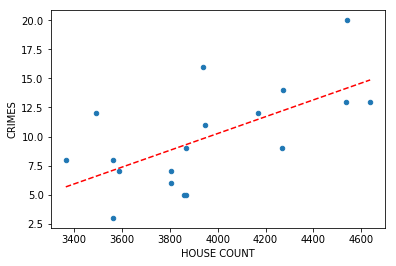

In [411]:
crime_correlation_df = greenfield_development_suburb_crime_df[crime_df_filter]
crime_correlation_df.columns = map(str.upper, crime_correlation_df.columns)
house_count_correlation_df = greenfield_development_suburb_house_count_df

def scatter_plot_suburb_crime_house_count(suburb):
    s1 = crime_correlation_df[suburb].rename("CRIMES")
    s2 = house_count_correlation_df[suburb].rename("HOUSE COUNT")
    s2a = s2[~s2.index.str.contains("2019")]
    df1 = pd.concat([s1, s2a], axis=1, sort=False)
    plot1 = df1.plot.scatter("HOUSE COUNT", "CRIMES")
    z = np.polyfit(s2a, s1, 1)
    p = np.poly1d(z)
    plot1.plot(s2a, p(s2a), "r--")
#     print("trendline equation: y={}.6x+({}.6)".format(z[0],z[1]))
    print(stats.pearsonr(s2a, s1)[0])
    
# suburb_test = "MARSDEN PARK"
# s1 = crime_correlation_df[suburb_test].rename("CRIMES")
# s2 = house_count_correlation_df[suburb_test].rename("HOUSE COUNT")
# s2a = s2[~s2.index.str.contains("2019")]
# z = np.polyfit(s1, s2a, 1)
# p = np.poly1d(z)

# # pylab.plot(x,p(x),"r--")
# # the line equation:
# # print "y=%.6fx+(%.6f)"%(z[0],z[1])

# scatter_plot_suburb_crime_house_count(greenfield_development_suburb_list[5])
# greenfield_development_suburb_list[5]

# suburb_test = "SCHOFIELDS"
# # s1 = crime_correlation_df[suburb_test].rename("CRIMES")
# # s2 = house_count_correlation_df[suburb_test].rename("HOUSE COUNT")
# # s2a = s2[~s2.index.str.contains("2019")]

# crime_correlation_df[suburb_test]

for i in range(1, 15):
    try:
        print(i)
        scatter_plot_suburb_crime_house_count(greenfield_development_suburb_list[i])
    except:
        pass